[0.75, 0.475, 0.2]
[[0.2, 0.4, 0.6, 0.8], [0.3, 0.5, 0.7], [0.3, 0.5, 0.7]]


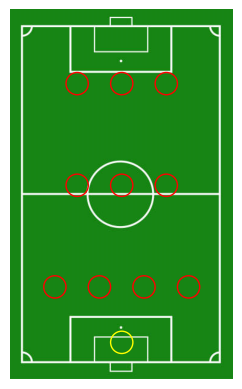

In [351]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import json

# 이미지 파일 로드
image_path = 'playground.png'  # 이미지 파일 경로 설정
image = Image.open(image_path)
width, height = image.size

# 이미지 위에 그래픽 그리기
def draw_on_image(image, *args):
    fig, ax = plt.subplots()
    ax.imshow(image)
    
    virtical_relative_positions = []
    horizontal_relative_positions = []
    
    virtical_rp = 0.75
    for _ in range(len(args)):
        virtical_relative_positions.append(round(virtical_rp,5))
        virtical_rp -= 0.55/(len(args)-1)
    # virtical_relative_positions += [0.9]
    
    for nums in args:
        horizontal_rp = 0.2
        horizontal_relative_per_positions = []
        for _ in range(nums):
            horizontal_relative_per_positions.append(round(horizontal_rp,5))
            if nums == 1:
                horizontal_rp += 0.6/(1)
            else:
                horizontal_rp += 0.6/(nums-1)
        if len(horizontal_relative_per_positions) == 1:
            horizontal_relative_per_positions = [0.5]
        if len(horizontal_relative_per_positions) == 2:
            horizontal_relative_per_positions = [0.4, 0.6]
        if len(horizontal_relative_per_positions) == 3:
            horizontal_relative_per_positions = [0.3, 0.5, 0.7]
        horizontal_relative_positions.append(horizontal_relative_per_positions)
    
    # 포지션(동그라미) 그리기 - 예시로 몇 개의 포지션을 임의로 추가
    for virtical_pos, horizontal_pos_list in zip(virtical_relative_positions, horizontal_relative_positions):
        circle_y = virtical_pos * height  # 세로 위치 계산
        for horizontal_pos in horizontal_pos_list:
            circle = plt.Circle((width * horizontal_pos, circle_y), width * 0.05, color="red", fill=False)
            ax.add_patch(circle)
            
    keep_circle_y = 0.9 * height        
    keep_circle = plt.Circle((width * 0.5, keep_circle_y), width * 0.05, color='yellow', fill=False)
    ax.add_patch(keep_circle)           
    
    # 축과 레이블 제거
    ax.axis('off')
    
    print(virtical_relative_positions)
    print(horizontal_relative_positions)
    
    return fig

# 이미지 위에 포지션 그리기 및 표시
fig = draw_on_image(image,4,3,3)
plt.show()

In [88]:
d = 0.2
n = 5
relative_positions = []

for i in range(n):
    relative_positions.append(round(d,5))
    d += 0.6/(n-1)
relative_positions

[0.2, 0.35, 0.5, 0.65, 0.8]

In [98]:
a = '''3-5-2 / 3-4-3 / 3-3-3-1 / 3-4-1-2 / 3-6-1 / 3-4-2-1 / 4-4-2 / 4-3-3 / 4-2-3-1 / 4-3-1-2 / 4-2-2-2 / 4-3-2-1 / 4-1-4-1 / 4-1-2-3 / 4-5-1 / 4-4-1-1 / 4-6-0 / 5-3-2 / 5-4-1'''
a

'3-5-2 / 3-4-3 / 3-3-3-1 / 3-4-1-2 / 3-6-1 / 3-4-2-1 / 4-4-2 / 4-3-3 / 4-2-3-1 / 4-3-1-2 / 4-2-2-2 / 4-3-2-1 / 4-1-4-1 / 4-1-2-3 / 4-5-1 / 4-4-1-1 / 4-6-0 / 5-3-2 / 5-4-1'

In [100]:
a.split(' / ')

['3-5-2',
 '3-4-3',
 '3-3-3-1',
 '3-4-1-2',
 '3-6-1',
 '3-4-2-1',
 '4-4-2',
 '4-3-3',
 '4-2-3-1',
 '4-3-1-2',
 '4-2-2-2',
 '4-3-2-1',
 '4-1-4-1',
 '4-1-2-3',
 '4-5-1',
 '4-4-1-1',
 '4-6-0',
 '5-3-2',
 '5-4-1']

In [346]:
import random

all_players = [f"선수{i+1}" for i in range(25)]
entry = dict()
random.seed(2022)
for p in all_players:
    positions = ["CF","WF","CM","WM","CB","WB","GK"]
    main_position = random.choice(positions)
    positions.remove(main_position)
    sub_position = random.sample(positions, random.randint(1, 5))
    if main_position == "GK":
        sub_position = []
        
    if "GK" in sub_position:
        sub_position.remove("GK")
    entry[p] = {"주포지션":main_position,"부포지션":sub_position}
with open('entry.json', 'w') as f : 
	json.dump(entry, f, indent=4, ensure_ascii=False)

{'선수1': {'주포지션': 'CB', '부포지션': ['WM', 'WB', 'CM']},
 '선수2': {'주포지션': 'CB', '부포지션': ['WB']},
 '선수3': {'주포지션': 'GK', '부포지션': []},
 '선수4': {'주포지션': 'CM', '부포지션': ['WB', 'CF', 'WM']},
 '선수5': {'주포지션': 'CM', '부포지션': ['WM']},
 '선수6': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WM', 'WF']},
 '선수7': {'주포지션': 'WF', '부포지션': ['CF']},
 '선수8': {'주포지션': 'WF', '부포지션': ['CB', 'CF', 'WB', 'WM']},
 '선수9': {'주포지션': 'CF', '부포지션': ['CB', 'WM', 'WF', 'CM']},
 '선수10': {'주포지션': 'WM', '부포지션': ['CF', 'CB', 'WF']},
 '선수11': {'주포지션': 'CF', '부포지션': ['CB']},
 '선수12': {'주포지션': 'WB', '부포지션': ['CB', 'WM', 'CM']},
 '선수13': {'주포지션': 'CF', '부포지션': ['WB']},
 '선수14': {'주포지션': 'WF', '부포지션': ['CB']},
 '선수15': {'주포지션': 'WM', '부포지션': ['WB', 'WF', 'CM', 'CB']},
 '선수16': {'주포지션': 'WM', '부포지션': ['CF', 'WF']},
 '선수17': {'주포지션': 'WF', '부포지션': ['CB']},
 '선수18': {'주포지션': 'WF', '부포지션': ['CF', 'CM', 'WB']},
 '선수19': {'주포지션': 'GK', '부포지션': []},
 '선수20': {'주포지션': 'WF', '부포지션': ['WB', 'WM']},
 '선수21': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WB', 'W

In [294]:
import math
import pandas as pd

main_pos_list = ['CB', 'CM', 'CM', 'CM', 'WF', 'WF', 'CF', 'WM', 'CF', 'WB', 'CF', 'WF', 'WM', 'WM', 'WF', 'WM', 'WM', 'WB']
sub_pos_list = ['WB', 'WB', 'CF', 'WM', 'WM', 'CF', 'CB', 'WM', 'WF', 'CF', 'CB', 'CF', 'WB', 'WM', 'CB', 'WM', 'WF', 'CM', 'CF', 'CB', 'WF', 'CB', 'CB', 'WM', 'CM', 'WB', 'CB', 'WB', 'WF', 'CM', 'CB', 'CF', 'WF', 'CB', 'WF', 'CB', 'WB', 'CF', 'WF', 'CM', 'CM', 'WF', 'WM', 'CF']
positions = ["CF","WF","CM","WM","CB","WB","GK"]
positions_mans = [0,0,0]
total_point = [0,0,0]
quater = 4

df_dict = dict()
for idx, p in enumerate(positions[:-1][::-1]):
    df_dict[p] = [main_pos_list.count(p), (sub_pos_list.count(p)), main_pos_list.count(p)+(sub_pos_list.count(p)), math.floor((main_pos_list.count(p)+(sub_pos_list.count(p)))/quater)]
    if p[-1] == 'B':
        positions_mans[0] += df_dict[p][-1]
        total_point[0] += df_dict[p][-2]
    if p[-1] == 'M':
        positions_mans[1] += df_dict[p][-1]
        total_point[1] += df_dict[p][-2]
    if p[-1] == 'F':
        positions_mans[2] += df_dict[p][-1]
        total_point[2] += df_dict[p][-2]
a = pd.DataFrame(df_dict, index = ['주포지션', '부포지션', '총점', '적정 인원'])
display(a)

# print(positions_mans)
# print(total_point)

max_nums_positions = total_point.index(max(total_point))
min_nums_positions = total_point.index(min(total_point))
median_nums_positions = [i for i in range(len(total_point)) if (i != max_nums_positions) & (i != min_nums_positions)][0]

count_positions = ["수비", "미드필더", "공격"]
print(f"오늘 South FC는 {count_positions[max_nums_positions]} 포지션이 많고 {count_positions[min_nums_positions]} 포지션이 적습니다.")

while sum(positions_mans) != 10:
    if sum(positions_mans) > 10:
        max_count_idx = positions_mans.index(max(positions_mans))
        positions_mans[max_count_idx] -=1
    if sum(positions_mans) < 10:
        min_count_idx = positions_mans.index(min(positions_mans))
        positions_mans[min_count_idx] +=1

print("추천 포메이션 : " + "-".join([str(i) for i in positions_mans]))

,WB,CB,WM,CM,WF,CF
주포지션,2,1,5,3,4,3
부포지션,6,10,7,5,8,8
총점,8,11,12,8,12,11
적정 인원,2,2,3,2,3,2


오늘 South FC는 공격 포지션이 많고 수비 포지션이 적습니다.
추천 포메이션 : 3-3-4


In [301]:
formation = '선택','4-4-2','4-3-3','4-2-3-1','4-3-1-2','4-2-2-2','4-3-2-1','4-1-4-1','4-1-2-3','4-5-1','4-4-1-1','3-5-2','3-4-3','3-3-3-1','3-4-1-2','3-4-2-1','5-3-2','5-4-1'
formation

('선택',
 '4-4-2',
 '4-3-3',
 '4-2-3-1',
 '4-3-1-2',
 '4-2-2-2',
 '4-3-2-1',
 '4-1-4-1',
 '4-1-2-3',
 '4-5-1',
 '4-4-1-1',
 '3-5-2',
 '3-4-3',
 '3-3-3-1',
 '3-4-1-2',
 '3-4-2-1',
 '5-3-2',
 '5-4-1')

In [337]:
position_list = [[]]
for forma in formation[1:]:
    f_split = forma.split('-')
    eng_position_list = []
    for idx, f in enumerate(f_split):
        if len(f_split) == 3:
            if idx == 0:
                if f == '3':
                    eng_position_list.append(['WB','CB','WB'])
                if f == '4':
                    eng_position_list.append(['WB','CB','CB','WB'])
                if f == '5':
                    eng_position_list.append(['WB','CB','CB','CB','WB'])
            if idx == 1:
                if f == '3':
                    eng_position_list.append(['CM','CM','CM'])
                if f == '4':
                    eng_position_list.append(['WM','CM','CM','WM'])
                if f == '5':
                    eng_position_list.append(['WM','CM','CM','CM','WM'])
            if idx == 2:
                if f == '1':
                    eng_position_list.append(['CF'])
                if f == '2':
                    eng_position_list.append(['CF','CF'])
                if f == '3':
                    eng_position_list.append(['WF','CF','WF'])
        
        if len(f_split) == 4:
            if idx == 0:
                if f == '3':
                    eng_position_list.append(['WB','CB','WB'])
                if f == '4':
                    eng_position_list.append(['WB','CB','CB','WB'])
            if idx == 1:
                if f == '1':
                    eng_position_list.append(['CM'])
                if f == '2':
                    eng_position_list.append(['CM','CM'])
                if f == '3':
                    eng_position_list.append(['CM','CM','CM'])
                if f == '4':
                    eng_position_list.append(['WM','CM','CM','WM'])
            if idx == 2:
                if f == '1':
                    eng_position_list.append(['CM'])
                if f == '2':
                    if eng_position_list[-1] == ['CM','CM']:
                        eng_position_list.append(['WM','WM'])
                    else:
                        eng_position_list.append(['CM','CM'])
                if f == '3':
                    eng_position_list.append(['WM','CM','WM'])
                if f == '4':
                    eng_position_list.append(['WM','CM','CM','WM'])
            if idx == 3:
                if f == '1':
                    eng_position_list.append(['CF'])
                if f == '2':
                    eng_position_list.append(['CF','CF'])
                if f == '3':
                    eng_position_list.append(['WF','CF','WF'])
                    
    position_list.append(eng_position_list)
    
eng_formation_dict = dict()
for k, v in zip(formation, position_list):
    eng_formation_dict[k] = v


with open('eng_formation_dict.json', 'w') as f : 
	json.dump(eng_formation_dict, f, indent=4, ensure_ascii=False)

{'선택': [],
 '4-4-2': [['WB', 'CB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'WM'], ['CF', 'CF']],
 '4-3-3': [['WB', 'CB', 'CB', 'WB'], ['CM', 'CM', 'CM'], ['WF', 'CF', 'WF']],
 '4-2-3-1': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM'],
  ['WM', 'CM', 'WM'],
  ['CF']],
 '4-3-1-2': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM', 'CM'],
  ['CM'],
  ['CF', 'CF']],
 '4-2-2-2': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM'],
  ['WM', 'WM'],
  ['CF', 'CF']],
 '4-3-2-1': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM', 'CM'],
  ['CM', 'CM'],
  ['CF']],
 '4-1-4-1': [['WB', 'CB', 'CB', 'WB'],
  ['CM'],
  ['WM', 'CM', 'CM', 'WM'],
  ['CF']],
 '4-1-2-3': [['WB', 'CB', 'CB', 'WB'],
  ['CM'],
  ['CM', 'CM'],
  ['WF', 'CF', 'WF']],
 '4-5-1': [['WB', 'CB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'CM', 'WM'], ['CF']],
 '4-4-1-1': [['WB', 'CB', 'CB', 'WB'],
  ['WM', 'CM', 'CM', 'WM'],
  ['CM'],
  ['CF']],
 '3-5-2': [['WB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'CM', 'WM'], ['CF', 'CF']],
 '3-4-3': [['WB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'WM'], ['WF

In [396]:
with open('entry.json', 'r') as f : 
	entry = json.load(f)
 
with open('eng_formation_dict.json', 'r') as f : 
	eng_formation_dict = json.load(f)


In [397]:
entry

{'선수1': {'주포지션': 'CB', '부포지션': ['WM', 'WB', 'CM']},
 '선수2': {'주포지션': 'CB', '부포지션': ['WB']},
 '선수3': {'주포지션': 'GK', '부포지션': []},
 '선수4': {'주포지션': 'CM', '부포지션': ['WB', 'CF', 'WM']},
 '선수5': {'주포지션': 'CM', '부포지션': ['WM']},
 '선수6': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WM', 'WF']},
 '선수7': {'주포지션': 'WF', '부포지션': ['CF']},
 '선수8': {'주포지션': 'WF', '부포지션': ['CB', 'CF', 'WB', 'WM']},
 '선수9': {'주포지션': 'CF', '부포지션': ['CB', 'WM', 'WF', 'CM']},
 '선수10': {'주포지션': 'WM', '부포지션': ['CF', 'CB', 'WF']},
 '선수11': {'주포지션': 'CF', '부포지션': ['CB']},
 '선수12': {'주포지션': 'WB', '부포지션': ['CB', 'WM', 'CM']},
 '선수13': {'주포지션': 'CF', '부포지션': ['WB']},
 '선수14': {'주포지션': 'WF', '부포지션': ['CB']},
 '선수15': {'주포지션': 'WM', '부포지션': ['WB', 'WF', 'CM', 'CB']},
 '선수16': {'주포지션': 'WM', '부포지션': ['CF', 'WF']},
 '선수17': {'주포지션': 'WF', '부포지션': ['CB']},
 '선수18': {'주포지션': 'WF', '부포지션': ['CF', 'CM', 'WB']},
 '선수19': {'주포지션': 'GK', '부포지션': []},
 '선수20': {'주포지션': 'WF', '부포지션': ['WB', 'WM']},
 '선수21': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WB', 'W

In [364]:
quarter_list = ['4-2-2-2', '4-3-3', '3-4-2-1', '5-3-2']
eng_formation_dict

{'선택': [],
 '4-4-2': [['WB', 'CB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'WM'], ['CF', 'CF']],
 '4-3-3': [['WB', 'CB', 'CB', 'WB'], ['CM', 'CM', 'CM'], ['WF', 'CF', 'WF']],
 '4-2-3-1': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM'],
  ['WM', 'CM', 'WM'],
  ['CF']],
 '4-3-1-2': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM', 'CM'],
  ['CM'],
  ['CF', 'CF']],
 '4-2-2-2': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM'],
  ['WM', 'WM'],
  ['CF', 'CF']],
 '4-3-2-1': [['WB', 'CB', 'CB', 'WB'],
  ['CM', 'CM', 'CM'],
  ['CM', 'CM'],
  ['CF']],
 '4-1-4-1': [['WB', 'CB', 'CB', 'WB'],
  ['CM'],
  ['WM', 'CM', 'CM', 'WM'],
  ['CF']],
 '4-1-2-3': [['WB', 'CB', 'CB', 'WB'],
  ['CM'],
  ['CM', 'CM'],
  ['WF', 'CF', 'WF']],
 '4-5-1': [['WB', 'CB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'CM', 'WM'], ['CF']],
 '4-4-1-1': [['WB', 'CB', 'CB', 'WB'],
  ['WM', 'CM', 'CM', 'WM'],
  ['CM'],
  ['CF']],
 '3-5-2': [['WB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'CM', 'WM'], ['CF', 'CF']],
 '3-4-3': [['WB', 'CB', 'WB'], ['WM', 'CM', 'CM', 'WM'], ['WF

In [383]:
for k in quarter_list:
    flattened_list = [item for sublist in eng_formation_dict[k] for item in sublist]
    print(k, flattened_list)
    for fl in flattened_list:
        print(fl)
        for k,v in entry.items():
            if (entry[k]['주포지션'] == fl):
                print("주포지션 :", k, " * ")
            if (fl in entry[k]['부포지션']):
                print("부포지션 :", k)
    print()   

4-2-2-2 ['WB', 'CB', 'CB', 'WB', 'CM', 'CM', 'WM', 'WM', 'CF', 'CF']
WB
부포지션 : 선수1
부포지션 : 선수2
부포지션 : 선수4
부포지션 : 선수8
주포지션 : 선수12  * 
부포지션 : 선수13
부포지션 : 선수15
부포지션 : 선수18
부포지션 : 선수20
부포지션 : 선수21
부포지션 : 선수22
주포지션 : 선수25  * 
CB
주포지션 : 선수1  * 
주포지션 : 선수2  * 
부포지션 : 선수6
부포지션 : 선수8
부포지션 : 선수9
부포지션 : 선수10
부포지션 : 선수11
부포지션 : 선수12
부포지션 : 선수14
부포지션 : 선수15
부포지션 : 선수17
부포지션 : 선수21
부포지션 : 선수22
부포지션 : 선수23
CB
주포지션 : 선수1  * 
주포지션 : 선수2  * 
부포지션 : 선수6
부포지션 : 선수8
부포지션 : 선수9
부포지션 : 선수10
부포지션 : 선수11
부포지션 : 선수12
부포지션 : 선수14
부포지션 : 선수15
부포지션 : 선수17
부포지션 : 선수21
부포지션 : 선수22
부포지션 : 선수23
WB
부포지션 : 선수1
부포지션 : 선수2
부포지션 : 선수4
부포지션 : 선수8
주포지션 : 선수12  * 
부포지션 : 선수13
부포지션 : 선수15
부포지션 : 선수18
부포지션 : 선수20
부포지션 : 선수21
부포지션 : 선수22
주포지션 : 선수25  * 
CM
부포지션 : 선수1
주포지션 : 선수4  * 
주포지션 : 선수5  * 
주포지션 : 선수6  * 
부포지션 : 선수9
부포지션 : 선수12
부포지션 : 선수15
부포지션 : 선수18
주포지션 : 선수21  * 
부포지션 : 선수23
부포지션 : 선수24
부포지션 : 선수25
CM
부포지션 : 선수1
주포지션 : 선수4  * 
주포지션 : 선수5  * 
주포지션 : 선수6  * 
부포지션 : 선수9
부포지션 : 선수12
부포지션 : 선수15
부포지션 : 선수18
주포지션 : 선수21  * 
부

In [392]:
a = ['선수3', '선수19', '선수1', '선수2', '선수4', '선수5', '선수6', '선수7', '선수8', '선수9', '선수10',
 '선수11', '선수12', '선수13', '선수14', '선수15', '선수16', '선수17', '선수18', '선수20', '선수21',
 '선수22', '선수23', '선수24', '선수25']

b = ['GK', 'GK', 'CB' ,'CB', 'CM', 'CM', 'CM', 'WF', 'WF', 'CF', 'WM', 'CF', 'WB', 'CF',
 'WF', 'WM', 'WM' ,'WF', 'WF', 'WF', 'CM', 'WM', 'WF', 'WM', 'WB']

c = [list([]), list([]), list(['WM', 'WB', 'CM']), list(['WB']),
 list(['WB', 'CF', 'WM']), list(['WM']), list(['CF', 'CB', 'WM', 'WF']),
 list(['CF']), list(['CB', 'CF', 'WB', 'WM']),
 list(['CB', 'WM', 'WF', 'CM']), list(['CF', 'CB', 'WF']), list(['CB']),
 list(['CB', 'WM', 'CM']), list(['WB']), list(['CB']),
 list(['WB', 'WF', 'CM', 'CB']), list(['CF', 'WF']), list(['CB']),
 list(['CF', 'CM', 'WB']), list(['WB', 'WM']),
 list(['CF', 'CB', 'WB', 'WM', 'WF']), list(['WF', 'CB', 'WB']),
 list(['CM', 'CB']), list(['CF', 'WF', 'CM']),
 list(['CM', 'WF', 'WM', 'CF'])]

d= [2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1]
change_quarter_df = pd.DataFrame({"선수명단":a, "주포지션":b, "부포지션":c, "쿼터 수":d})

In [413]:
np.random.randint(1,4,2)

array([1, 2])

In [470]:
Quater_1_squad = ['선수2', '선수3', '선수8', '선수9', '선수11', '선수14', '선수16', '선수18']
Quater_2_squad = ['선수3', '선수9', '선수10', '선수11', '선수12', '선수14', '선수15', '선수17', '선수20', '선수21']
Quater_3_squad = ['선수3', '선수4', '선수5', '선수7', '선수10', '선수11', '선수12', '선수13', '선수15', '선수16', '선수17', '선수18', '선수21', '선수23']
Quater_4_squad = ['선수2', '선수3', '선수4', '선수5', '선수7', '선수8', '선수10', '선수13', '선수14', '선수15', '선수20', '선수23']

Quater_squad = [Quater_1_squad, Quater_2_squad, Quater_3_squad, Quater_4_squad]

In [471]:
a = Quater_3_squad.difference(Quater_1_squad)
print(a)
b = list(a)
random.shuffle(b)
print(b)

{'선수4', '선수10', '선수23', '선수13', '선수5', '선수7', '선수15', '선수21', '선수12', '선수17'}
['선수13', '선수23', '선수7', '선수5', '선수21', '선수10', '선수4', '선수15', '선수12', '선수17']


In [477]:
strs = ["banana", "apple", "watermelon", "strawberry"]

min_str = max(Quater_squad, key=len)

print(min_str)

{'선수16', '선수4', '선수10', '선수23', '선수3', '선수13', '선수5', '선수7', '선수21', '선수15', '선수11', '선수18', '선수12', '선수17'}


In [472]:
import copy
final_Quater_squad = []
Quater_squad_copy = copy.deepcopy(Quater_squad)

for squad in Quater_squad:
    if len(squad) != 11:
        diff_mans = Quater_squad[-1].difference(squad)
        diff_mans = list(diff_mans)
        random.shuffle(diff_mans)
        squad = list(squad)
        squad += diff_mans[:11-len(squad)]
        for d in diff_mans[:11-len(squad)]:
            Quater_squad[-1].remove(d)
    else:
        squad = list(squad)
    final_Quater_squad.append(squad)

In [473]:
for i in final_Quater_squad:
    print(len(i))

11
11
17
14


In [486]:
def adjust_squad_lengths(quater_squad):
    # 목표 길이 설정
    target_length = 11
    
    # 모든 리스트의 길이가 목표 길이에 도달할 때까지 반복
    while not all(len(squad) == target_length for squad in quater_squad):
        # 가장 긴 리스트 찾기
        max_length = max(len(squad) for squad in quater_squad)
        for squad in quater_squad:
            if len(squad) == max_length:
                longest_squad = squad
                break
        
        # 길이가 11이 아닌 리스트에 대해 조정
        for squad in quater_squad:
            if len(squad) < target_length and longest_squad:
                # 가장 긴 리스트에서 선수 제거 및 현재 리스트에 추가
                # 중복되지 않는 선수만 추가
                player = longest_squad.pop()
                if player not in squad:
                    squad.append(player)
                else:
                    # 중복된 선수를 다시 가장 긴 리스트에 추가
                    longest_squad.insert(0, player)

    return quater_squad

# 초기 선수 명단
Quater_1_squad = ['선수2', '선수3', '선수8', '선수9', '선수11', '선수14', '선수16', '선수18']
Quater_2_squad = ['선수3', '선수9', '선수10', '선수11', '선수12', '선수14', '선수15', '선수17', '선수20', '선수21']
Quater_3_squad = ['선수3', '선수4', '선수5', '선수7', '선수10', '선수11', '선수12', '선수13', '선수15', '선수16', '선수17', '선수18', '선수21', '선수23']
Quater_4_squad = ['선수2', '선수3', '선수4', '선수5', '선수7', '선수8', '선수10', '선수13', '선수14', '선수15', '선수20', '선수23']

Quater_squad = [Quater_1_squad, Quater_2_squad, Quater_3_squad, Quater_4_squad]

# 함수 실행
adjusted_quater_squad = adjust_squad_lengths(Quater_squad)
adjusted_quater_squad


[['선수2',
  '선수3',
  '선수8',
  '선수9',
  '선수11',
  '선수14',
  '선수16',
  '선수18',
  '선수23',
  '선수13',
  '선수7'],
 ['선수3',
  '선수9',
  '선수10',
  '선수11',
  '선수12',
  '선수14',
  '선수15',
  '선수17',
  '선수20',
  '선수21',
  '선수5'],
 ['선수10',
  '선수11',
  '선수12',
  '선수15',
  '선수16',
  '선수17',
  '선수18',
  '선수21',
  '선수3',
  '선수4',
  '선수23'],
 ['선수2',
  '선수3',
  '선수4',
  '선수5',
  '선수7',
  '선수8',
  '선수10',
  '선수13',
  '선수14',
  '선수15',
  '선수20']]

In [491]:
all_list = []
for i in adjusted_quater_squad:
    print(i)
    all_list.extend(i)
    
print(set(all_list))
for i in set(all_list):
    for j in adjusted_quater_squad:
        if i in j:
            
    


['선수2', '선수3', '선수8', '선수9', '선수11', '선수14', '선수16', '선수18', '선수23', '선수13', '선수7']
['선수3', '선수9', '선수10', '선수11', '선수12', '선수14', '선수15', '선수17', '선수20', '선수21', '선수5']
['선수10', '선수11', '선수12', '선수15', '선수16', '선수17', '선수18', '선수21', '선수3', '선수4', '선수23']
['선수2', '선수3', '선수4', '선수5', '선수7', '선수8', '선수10', '선수13', '선수14', '선수15', '선수20']
{'선수4', '선수5', '선수21', '선수12', '선수17', '선수2', '선수10', '선수23', '선수3', '선수20', '선수14', '선수9', '선수16', '선수7', '선수15', '선수11', '선수18', '선수8', '선수13'}


In [494]:
a= '''{'선수3': {'주포지션': 'GK', '부포지션': [], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수4': {'주포지션': 'CM', '부포지션': ['WB', 'CF', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수5': {'주포지션': 'CM', '부포지션': ['WM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수6': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WM', 'WF'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수7': {'주포지션': 'WF', '부포지션': ['CF'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수8': {'주포지션': 'WF', '부포지션': ['CB', 'CF', 'WB', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수9': {'주포지션': 'CF', '부포지션': ['CB', 'WM', 'WF', 'CM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수10': {'주포지션': 'WM', '부포지션': ['CF', 'CB', 'WF'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수11': {'주포지션': 'CF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수13': {'주포지션': 'CF', '부포지션': ['WB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}, '선수14': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수15': {'주포지션': 'WM', '부포지션': ['WB', 'WF', 'CM', 'CB'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수17': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}}'''
b ='''{'선수3': {'주포지션': 'GK', '부포지션': [], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수4': {'주포지션': 'CM', '부포지션': ['WB', 'CF', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수5': {'주포지션': 'CM', '부포지션': ['WM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수6': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WM', 'WF'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수7': {'주포지션': 'WF', '부포지션': ['CF'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수8': {'주포지션': 'WF', '부포지션': ['CB', 'CF', 'WB', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수9': {'주포지션': 'CF', '부포지션': ['CB', 'WM', 'WF', 'CM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수10': {'주포지션': 'WM', '부포지션': ['CF', 'CB', 'WF'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수11': {'주포지션': 'CF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수13': {'주포지션': 'CF', '부포지션': ['WB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}, '선수14': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수15': {'주포지션': 'WM', '부포지션': ['WB', 'WF', 'CM', 'CB'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수17': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}}'''
c= '''{'선수3': {'주포지션': 'GK', '부포지션': [], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수4': {'주포지션': 'CM', '부포지션': ['WB', 'CF', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수5': {'주포지션': 'CM', '부포지션': ['WM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수6': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WM', 'WF'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수7': {'주포지션': 'WF', '부포지션': ['CF'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수8': {'주포지션': 'WF', '부포지션': ['CB', 'CF', 'WB', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수9': {'주포지션': 'CF', '부포지션': ['CB', 'WM', 'WF', 'CM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수10': {'주포지션': 'WM', '부포지션': ['CF', 'CB', 'WF'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수11': {'주포지션': 'CF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수13': {'주포지션': 'CF', '부포지션': ['WB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}, '선수14': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수15': {'주포지션': 'WM', '부포지션': ['WB', 'WF', 'CM', 'CB'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수17': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}}'''
d='''{'선수3': {'주포지션': 'GK', '부포지션': [], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수4': {'주포지션': 'CM', '부포지션': ['WB', 'CF', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수5': {'주포지션': 'CM', '부포지션': ['WM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수6': {'주포지션': 'CM', '부포지션': ['CF', 'CB', 'WM', 'WF'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수7': {'주포지션': 'WF', '부포지션': ['CF'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수8': {'주포지션': 'WF', '부포지션': ['CB', 'CF', 'WB', 'WM'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 3]}, '선수9': {'주포지션': 'CF', '부포지션': ['CB', 'WM', 'WF', 'CM'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수10': {'주포지션': 'WM', '부포지션': ['CF', 'CB', 'WF'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수11': {'주포지션': 'CF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 3, 4]}, '선수13': {'주포지션': 'CF', '부포지션': ['WB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}, '선수14': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 4.0, '참가 쿼터': [1, 2, 3, 4]}, '선수15': {'주포지션': 'WM', '부포지션': ['WB', 'WF', 'CM', 'CB'], '쿼터 수': 3.0, '참가 쿼터': [2, 3, 4]}, '선수17': {'주포지션': 'WF', '부포지션': ['CB'], '쿼터 수': 3.0, '참가 쿼터': [1, 2, 4]}}'''

In [496]:
a==b==c==d

True

In [2]:
import time
start = time.time()
start-5

1708692015.6826777

In [13]:
all_entry = dict()

a = ["김동선" ,"김선광" ,"김성재" ,"김영목" ,"김은민" ,"김철영" ,"남태현" ,"민병인" ,"박창후" ,"서윤찬" ,"서종민" ,"소지호" ,"이병훈" ,"이산호" ,"이재성" ,"이종현" ,"정지원" ,"조성민" ,"조영수" ,"차종수" ,"최민규" ,"최형근" ,"최형주" ,"구형준" ,"홍태호", "용병1", "용병2", "용병3", "용병4", "용병5" ]
b = ["WB", "CF", "CB", "CM", "CM", "WB", "CM", "GK", "WF", "WF", "CB", "WF", "CB", "WF", "CF", "WF", "WF", "WB", "CM", "CF", "CB", "CM", "WB", "CF", "CM", "", "", "", "", ""]
c = [["GK"], ["CM", "WB"], ["WB"], ["CB"], ["WB"], ["CB", "CF"], ["CB", "WB"], [], ["CM","WM","WB"], ["CM","CF"], ["WB", "WF"], ["CM", "WB"], ["CM", "WB"], ["WB", "WM"], ["WF", "CM", "WM"], ["CM", "WM", "CF"], ["CF", "WB"], ["CB"], ["WB"], ["WB", "GK"], ["CM"], ["WF", "WB", "CF"], ["CM"], ["WF", "WB"], ["WF", "CF"], [], [], [], [], []]

for i, j, k in zip(a, b, c):
    all_entry[i] = {"주포지션":j,"부포지션":k}
    
all_entry

{'김동선': {'주포지션': 'WB', '부포지션': ['GK']},
 '김선광': {'주포지션': 'CF', '부포지션': ['CM', 'WB']},
 '김성재': {'주포지션': 'CB', '부포지션': ['WB']},
 '김영목': {'주포지션': 'CM', '부포지션': ['CB']},
 '김은민': {'주포지션': 'CM', '부포지션': ['WB']},
 '김철영': {'주포지션': 'WB', '부포지션': ['CB', 'CF']},
 '남태현': {'주포지션': 'CM', '부포지션': ['CB', 'WB']},
 '민병인': {'주포지션': 'GK', '부포지션': []},
 '박창후': {'주포지션': 'WF', '부포지션': ['CM', 'WM', 'WB']},
 '서윤찬': {'주포지션': 'WF', '부포지션': ['CM', 'CF']},
 '서종민': {'주포지션': 'CB', '부포지션': ['WB', 'WF']},
 '소지호': {'주포지션': 'WF', '부포지션': ['CM', 'WB']},
 '이병훈': {'주포지션': 'CB', '부포지션': ['CM', 'WB']},
 '이산호': {'주포지션': 'WF', '부포지션': ['WB', 'WM']},
 '이재성': {'주포지션': 'CF', '부포지션': ['WF', 'CM', 'WM']},
 '이종현': {'주포지션': 'WF', '부포지션': ['CM', 'WM', 'CF']},
 '정지원': {'주포지션': 'WF', '부포지션': ['CF', 'WB']},
 '조성민': {'주포지션': 'WB', '부포지션': ['CB']},
 '조영수': {'주포지션': 'CM', '부포지션': ['WB']},
 '차종수': {'주포지션': 'CF', '부포지션': ['WB', 'GK']},
 '최민규': {'주포지션': 'CB', '부포지션': ['CM']},
 '최형근': {'주포지션': 'CM', '부포지션': ['WF', 'WB', 'CF']},
 '최형주': {'주포지션':

In [18]:
a = {'김동선': {'주포지션': 'WB', '부포지션': ['GK']}, '김선광': {'주포지션': 'CF', '부포지션': ['CM', 'WB']}, '김성재': {'주포지션': 'CB', '부포지션': ['WB']}, '김영목': {'주포지션': 'CM', '부포지션': ['CB']}, '김은민': {'주포지션': 'CM', '부포지션': ['WB']}, '김철영': {'주포지션': 'WB', '부포지션': ['CB', 'CF']}, '남태현': {'주포지션': 'CM', '부포지션': ['CB', 'WB']}, '민병인': {'주포지션': 'GK', '부포지션': []}, '박창후': {'주포지션': 'WF', '부포지션': ['CM', 'WM', 'WB']}, '서윤찬': {'주포지션': 'WF', '부포지션': ['CM', 'CF']}, '서종민': {'주포지션': 'CB', '부포지션': ['WB', 'WF']}, '소지호': {'주포지션': 'WF', '부포지션': ['CM', 'WB']}, '이병훈': {'주포지션': 'CB', '부포지션': ['CM', 'WB']}, '이산호': {'주포지션': 'WF', '부포지션': ['WB', 'WM']}, '이재성': {'주포지션': 'CF', '부포지션': ['WF', 'CM', 'WM']}, '이종현': {'주포지션': 'WF', '부포지션': ['CM', 'WM', 'CF']}, '정지원': {'주포지션': 'WF', '부포지션': ['CF', 'WB']}, '조성민': {'주포지션': 'WB', '부포지션': ['CB']}, '조영수': {'주포지션': 'CM', '부포지션': ['WB']}, '차종수': {'주포지션': 'CF', '부포지션': ['WB', 'GK']}, '최민규': {'주포지션': 'CB', '부포지션': ['CM']}, '최형근': {'주포지션': 'CM', '부포지션': ['WF', 'WB', 'CF']}, '최형주': {'주포지션': 'WB', '부포지션': ['CM']}, '구형준': {'주포지션': 'CF', '부포지션': ['WF', 'WB']}, '홍태호': {'주포지션': 'CM', '부포지션': ['WF', 'CF']}, '용병1': {'주포지션': '', '부포지션': []}, '용병2': {'주포지션': '', '부포지션': []}, '용병3': {'주포지션': '', '부포지션': []}, '용병4': {'주포지션': '', '부포지션': []}, '용병5': {'주포지션': '', '부포지션': []}}
a

{'김동선': {'주포지션': 'WB', '부포지션': ['GK']},
 '김선광': {'주포지션': 'CF', '부포지션': ['CM', 'WB']},
 '김성재': {'주포지션': 'CB', '부포지션': ['WB']},
 '김영목': {'주포지션': 'CM', '부포지션': ['CB']},
 '김은민': {'주포지션': 'CM', '부포지션': ['WB']},
 '김철영': {'주포지션': 'WB', '부포지션': ['CB', 'CF']},
 '남태현': {'주포지션': 'CM', '부포지션': ['CB', 'WB']},
 '민병인': {'주포지션': 'GK', '부포지션': []},
 '박창후': {'주포지션': 'WF', '부포지션': ['CM', 'WM', 'WB']},
 '서윤찬': {'주포지션': 'WF', '부포지션': ['CM', 'CF']},
 '서종민': {'주포지션': 'CB', '부포지션': ['WB', 'WF']},
 '소지호': {'주포지션': 'WF', '부포지션': ['CM', 'WB']},
 '이병훈': {'주포지션': 'CB', '부포지션': ['CM', 'WB']},
 '이산호': {'주포지션': 'WF', '부포지션': ['WB', 'WM']},
 '이재성': {'주포지션': 'CF', '부포지션': ['WF', 'CM', 'WM']},
 '이종현': {'주포지션': 'WF', '부포지션': ['CM', 'WM', 'CF']},
 '정지원': {'주포지션': 'WF', '부포지션': ['CF', 'WB']},
 '조성민': {'주포지션': 'WB', '부포지션': ['CB']},
 '조영수': {'주포지션': 'CM', '부포지션': ['WB']},
 '차종수': {'주포지션': 'CF', '부포지션': ['WB', 'GK']},
 '최민규': {'주포지션': 'CB', '부포지션': ['CM']},
 '최형근': {'주포지션': 'CM', '부포지션': ['WF', 'WB', 'CF']},
 '최형주': {'주포지션':

In [19]:
a.update([{'호날두': {'주포지션': 'CF', '부포지션': ['WB']}}][0])

In [2]:
a = [1,2,3,4]
a.remove(2)
print(a)

[1, 3, 4]
